# Lab Assignment 2



### Sam Daucey, s2028017

## Presentation and coding style (3 marks)

In this assignment, some marks are allocated to your coding style and presentation. Try to make your code more readable using the tips given in your computer lab 2. Make sure your figures have good quality, right size, good range and proper labels.

## Task 1 (4 marks)

In this task we try to use several method from Lab 2 to solve the initial value problem 

\begin{equation}
y' = 3y-4t, \quad y(0)=1,
\end{equation}

Set the step size to $h = 0.05$ and numerically solve this ODE from $t=0$ to $0.5$ using the following methods:

- Forward Euler 

- Adams–Bashforth order 2

- Adams–Bashforth order 3 (we did not code this method in the computer lab, but you can find the formula on [this wikipedia page](https://en.wikipedia.org/wiki/Linear_multistep_method)). For this method, you need to build the very first two steps using other methods. For the first step, use the Euler scheme. For the second step, use Adams–Bashforth order 2. 


Plot the three different approximations, and display the values in a table.

In [1]:
# Import packages
import math
import numpy as np
import matplotlib.pyplot as plt

def AB_s_coeffs(s):
    """Returns the coefficients for the s-step Adams-Bashforth method up to s=3."""
    return {
        1: [1],
        2: [-1/2, 3/2],
        3: [5/12, -16/12, 23/12]
    }[s]


def AB_s_step(s, dy_dt, y_tup, t_tup, dt):
    """
    Returns an approximation for y_(n+1) using the s-step Adams-Bashforth method.
    ----------------------------------------------------------
    inputs:
        s: the order of the AB method
        dy_dt: the RHS function in the system of ODE
        y_tup: an s-tuple containing [y_(n-s+1), y_(n-s+2) ... y_n]
        t_tup: an s-tuple containing [t_(n-s+1), t_(n-s+2) ... t_n]
        dt: the step size
    """
    # Retreive the s-step coefficients
    coeffs =  AB_s_coeffs(s)
    
    # Compute the change in y using the Adams-Bashforth formula
    dy = dt * sum(
        c * dy_dt(y_i, t_i) for c, y_i, t_i in zip(coeffs, y_tup, t_tup)
    )
    
    # Use the change in y to return y_(n+1)
    y_n = y_tup[-1]
    return y_n + dy


def AB_s_solve(s, dy_dt, y_0, t_0, t_end, h):
    """
    Solves the differential equation t' = dy_dt(y, t) numerically using the s-step Adams-Bashforth method.
    ----------------------------------------------------------
    inputs:
        s: the order of the AB method
        dy_dt: the RHS function in the system of ODE
        y_0: initial condition on y,  y(t_0) = y_0
        t_0: initial time
        t_end: end time
        h: step size
    output:
        y: the solution of ODE. 
        t: the times at which this solution was evaluated at: y[i] ~ y(t[i])"""
    
    # We need to add an extra step to account for the fact we want to evaluate at the start and end points.
    step_count = math.ceil((t_end - t_0)/h) + 1
    y = np.zeros(step_count)
    t = np.linspace(t_0, t_end, step_count)
    y[0] = y_0
    
    # Generate y[1], y[2] ... y[s-1] using the 1, 2 ... s-1 step AB methods
    for i in range(1, s):
        y_tup = y[:i]
        t_tup = t[:i]
        y[i] = AB_s_step(i, dy_dt, y_tup, t_tup, h)
        
    # Generate y[s], y[s+1] ... using the s step AB method
    for i in range(s, step_count):
        y_tup = y[i-s:i]
        t_tup = t[i-s:i]
        y[i] = AB_s_step(s, dy_dt, y_tup, t_tup, h)
    
    return t, y

In [2]:
#  defining the function in the RHS of the ODE given in the question
def y_prime(y, t):
    return 3*y - 4*t

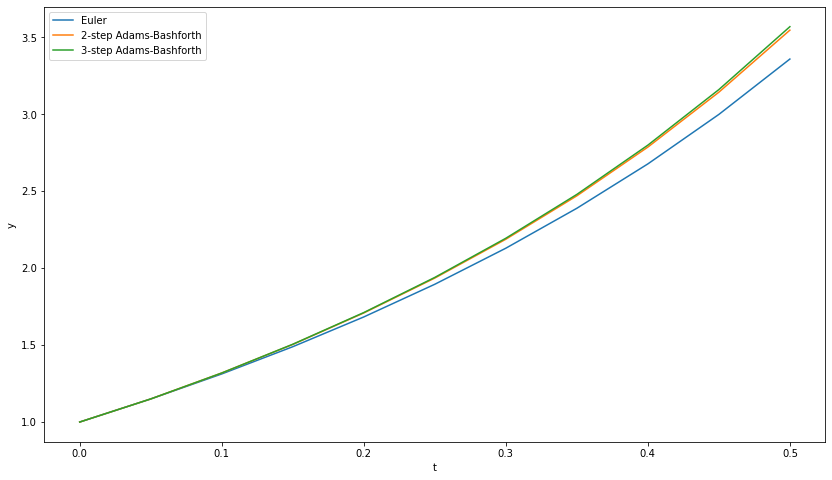

In [3]:

# Note that Euler's method is just the one-step Adams-Bashforth method,
# Hence we can use s-step Adams-Bashforth to get all the solutions.
euler_soln = AB_s_solve(1, y_prime, 1, 0, 0.5, 0.05)
AB2_soln = AB_s_solve(2, y_prime, 1, 0, 0.5, 0.05)
AB3_soln = AB_s_solve(3, y_prime, 1, 0, 0.5, 0.05)

# Plot the results
fig, ax = plt.subplots(figsize=(14, 8))

ax.set_xlabel("t")
ax.set_ylabel("y")

ax.plot(*euler_soln, label="Euler")
ax.plot(*AB2_soln, label="2-step Adams-Bashforth")
ax.plot(*AB3_soln, label="3-step Adams-Bashforth")

ax.legend()

In [4]:
from pandas import DataFrame

# printing the solution in a table:
DataFrame({
    "Euler": euler_soln[1],
    "2-step Adams-Bashforth": AB2_soln[1],
    "3-step Adams-Bashforth": AB3_soln[1]
}, index=euler_soln[0])


,Euler,2-step Adams-Bashforth,3-step Adams-Bashforth
0.00,1.000000,1.000000,1.000000
0.05,1.150000,1.150000,1.150000
0.10,1.312500,1.318750,1.318750
0.15,1.489375,1.504219,1.505391
0.20,1.682781,1.708762,1.711315
0.25,1.895198,1.935417,1.939662
0.30,2.129478,2.187728,2.194139
0.35,2.388900,2.469811,2.478979
0.40,2.677235,2.786439,2.799086
0.45,2.998820,3.143152,3.160162


## Task 2 (3 marks)

Use `SymPy` to solve the differential equation $y' = 3y-4t$, with $y(0)=1$, present the analytical solution, and check the exact value of $y(0.5)$.

Compare the result with the approximations from the three methods in Task 1. You may use a table to show the results of each method at $y(0.5)$. Which method is the most/least accurate? Why?

In [5]:
# standard setup
import sympy as sym
sym.init_printing()
from IPython.display import display_latex
import sympy.plotting as sym_plot

# Define symbols to use with sympy
t = sym.symbols("t")
y = sym.Function("y")
y_prime = y(t).diff(t)

# Define and solve the differential equation
diff_eq = sym.Eq(y_prime, 3*y(t) - 4*t)

sol = sym.dsolve(diff_eq, ics={y(0):1})

# Print the solution into the console
print("The solution is:")
display_latex(sol)

print("evaluated at 0.5:")
display_latex(sol.subs(t, 0.5))

# Substitute t into our symbolic solution for each t in our range
t_eval = np.linspace(0, 0.5, 11)
y_expr = sol.rhs
exact_soln = [y_expr.subs(t, t_i) for t_i in t_eval]


The solution is:


evaluated at 0.5:


We can see that our most accurate approximation of $y(0.5)$ came from the order-3 Adams-Bashforth method, followed by the order-2 Adams Bashforth method,  with the least accurate being Euler's method. This is unsuprising, as the higher order methods will eventually have a lower global truncation error for sufficiently small h. 

On top of this, the step size $h=0.05$ is still relatively large in comparison to how precise floating point numbers are, so the higher round-off error associated with doing more computations for the Adams-Bashforth methods had negligible effect. Hence the majority of the total global error was truncation error, which the higher order Adams-Bashforth methods performed better on.